# Лабораторная работа №3 по курсу "Интеллектуальный анализ данных".

Лабораторная работа №3 "Классификация в sklearn. Метрики классификации".<br>
Выполнил студент группы 6133-010402 Мелешенко Иван.

# [**Задание на лабораторную работу.**](https://github.com/kvvik/DS_SamU/blob/main/tasks/lab_3_classification_groupNumber_SecondName.ipynb)

## ***Задание 1.***<br>Выберите наборы данных, подходящие для многоклассовой и бинарной классификации.<br>

Произвести описание данные. В общем, провести "визуальный" анализ данных.

---

## ***Задание 2.***<br>Многоклассовая классификация<br>

* 1.1. На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

* 1.2. То же самое с использованием кросс-валидации

* 1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

* 1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). (пример):

---

## ***Задание 3.***<br>Бинарная классификация<br>

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

---

## ***Задание 4.***<br>Нормализация признаков <br>

Использование нормализации признаков в обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

# Выполнение заданий лабораторной работы

## Этап 0. Загрузка библиотек. Подключение Google Drive.

Подключим необхоимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Смонтируем образ Google диска для ускоренной и упрощенной загрузки файл в программу.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Этап 1. Многоклассовая классификация. Классификация при помощи решающего дерева.

### Загрузка данных

Загрузка данных из файла в качестве набора данных используется этот [Dataset](https://www.kaggle.com/rajyellow46/wine-quality).

In [3]:
wine_data = pd.read_csv('/content/drive/MyDrive/datasets/winequalityN.csv')

Просмотрим загруженные данные.

In [4]:
wine_data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Описание данных

***Небольшая ремарка:***<br>
*Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде". Ссылка [Cortez et al., 2009]. Из-за проблем с конфиденциальностью и логистики доступны только физико-химические (исходные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т. д.).<br>Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин потребляют больше, чем отличных или плохих). Алгоритмы обнаружения посторонних элементов могут использоваться для обнаружения нескольких отличных или плохих вин.*
<br>

Набор атрибутов:

Тип вина
* fixed acidity - фиксированная кислотность
* volatile acidity - летучая кислотность
* citric acid - лимонная кислота
* residual sugar - остаточный сахар
* chlorides - хлориды
* free sulfur dioxide - свободный диоксид серы
* total sulfur dioxide - общий диоксид серы
* density - плотнось
* pH - водородный показатель
* sulphates - сульфаты
* alcohol - степень содержания алкоголя
* quality - оценка (от 0 до 10)

### Обработка данных.

#### Балансировка целевой переменной (качество):

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


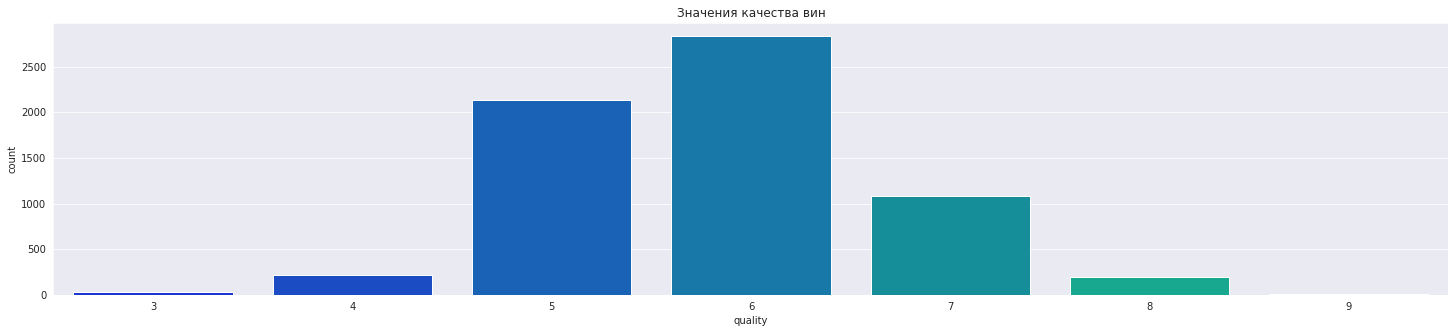

In [5]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(wine_data['quality'], palette='winter')
ax.set(title='Значения качества вин')
plt.show()

#### Проверка пропущенных значений.

In [6]:
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### Переименуем для удобства работы названия столбцов.

In [7]:
wine_data = wine_data.rename(columns={
    'fixed acidity': 'f_acid', 
    'volatile acidity': 'v_acid', 
    'citric acid': 'c_acid', 
    'residual sugar': 'r_sugar',
    'free sulfur dioxide': 'f_s_dioxide',
    'total sulfur dioxide': 't_s_dioxide'})

#### Заполним пропущенные значения.

In [8]:
wine_data.f_acid = wine_data.f_acid.fillna(wine_data.f_acid.mean())
wine_data.v_acid = wine_data.v_acid.fillna(wine_data.v_acid.mean())
wine_data.c_acid = wine_data.c_acid.fillna(wine_data.c_acid.mean())
wine_data.r_sugar = wine_data.r_sugar.fillna(wine_data.r_sugar.mean())
wine_data.chlorides = wine_data.chlorides.fillna(wine_data.chlorides.mean())
wine_data.pH = wine_data.pH.fillna(wine_data.pH.mean())
wine_data.sulphates = wine_data.sulphates.fillna(wine_data.sulphates.mean())

#### Контрольная проверка пропущенных значений.

In [9]:
wine_data.isna().sum()

type           0
f_acid         0
v_acid         0
c_acid         0
r_sugar        0
chlorides      0
f_s_dioxide    0
t_s_dioxide    0
density        0
pH             0
sulphates      0
alcohol        0
quality        0
dtype: int64

#### Посмотрим корреляцию между признаками:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


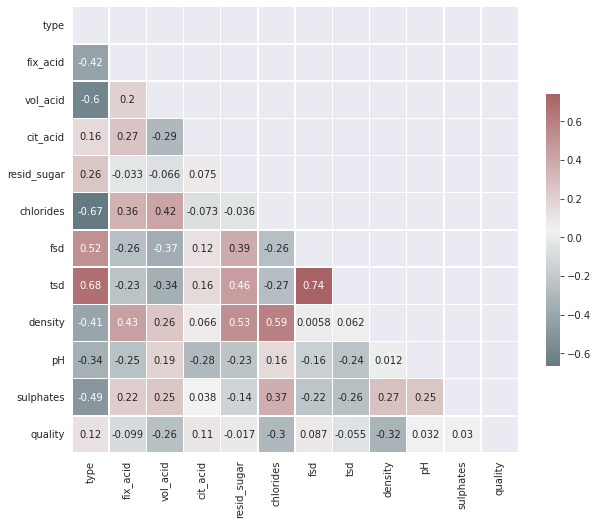

In [10]:
wine_features = {
    'type': wine_data['type'],
    'fix_acid': wine_data['f_acid'],
    'vol_acid': wine_data['v_acid'],
    'cit_acid': wine_data['c_acid'],
    'resid_sugar': wine_data['r_sugar'],
    'chlorides': wine_data['chlorides'],
    'fsd': wine_data['f_s_dioxide'],
    'tsd': wine_data['t_s_dioxide'],
    'density': wine_data['density'],
    'pH': wine_data['pH'],
    'sulphates': wine_data['sulphates'],
    'quality': wine_data['quality']
}

wine_features = pd.DataFrame.from_dict(wine_features)
wine_features['type'] = wine_features['type'].astype('category').cat.codes
wine_features['quality'] = wine_features['quality'].astype('category').cat.codes
wine_features['pH'] = wine_features['pH'].astype('category').cat.codes

corr = wine_features.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, 30, as_cmap=True)
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            annot=True)
plt.show()

Из графика очевидно, что целевая переменная хорошо коррелирует с признаками fsd, fix_acid и удовлетворительно коррелирует с признаком tsd.

### Описание функций для поиска гиперпараметров и вывода результатов.

In [11]:
# параметры для дерева решений
params = dict(max_depth = np.linspace(1, 32, 32, endpoint=True), 
                      min_samples_split = np.linspace(0.01, 0.1, 10, endpoint=True),
                      min_samples_leaf = np.linspace(0.01, 0.1, 10, endpoint=True)
                      )

# поиск лучших гиперпараметров
def do_grid_search(model,params, x_train, y_train, x_test, refit='accuracy'):
    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    grid_search = GridSearchCV(model, params, scoring=['accuracy'], 
                                n_jobs=4, cv=cv, verbose=3, refit=refit) 
    grid_search.fit(x_train.values, y_train.values)
    y_pred = grid_search.predict(x_test.values)
    print('Best params for {}'.format(refit))
    print(grid_search.best_params_)

# вывод результата
def print_result(y_test, pred=None):
  print("результат классификации: \n", classification_report(y_test, pred))
  conf_matrix = confusion_matrix(y_test, pred)
  print("Матрица ошибок: \n", conf_matrix, "\n")
  sns.heatmap(conf_matrix, cmap = cmap, annot=True)
  plt.show()

### Разделение данных на обучающую и тестовую выборки.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine_features.drop('quality',axis=1), wine_features['quality'], test_size=0.6, random_state=42)

### Классификация без настройки гиперпараметров

результат классификации: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.18      0.11      0.14       136
           2       0.57      0.56      0.56      1283
           3       0.57      0.58      0.57      1694
           4       0.47      0.48      0.47       656
           5       0.27      0.28      0.27       116
           6       0.00      0.00      0.00         1

    accuracy                           0.53      3899
   macro avg       0.29      0.29      0.29      3899
weighted avg       0.52      0.53      0.53      3899

Матрица ошибок: 
 [[  0   0   7   5   1   0   0]
 [  2  15  61  49   7   2   0]
 [  9  33 721 433  71  15   1]
 [ 10  25 392 976 250  40   1]
 [  1   7  72 234 313  28   1]
 [  1   2  22  30  29  32   0]
 [  0   0   0   0   1   0   0]] 



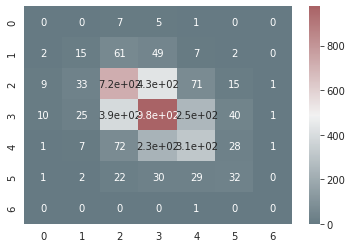

Средняя точность без настройки гиперпараметров:  0.49846376167185413


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [13]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print_result(y_test=y_test, pred=predictions)
score = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность без настройки гиперпараметров: ', np.mean(score))

Точность низковата, предположим что настройка гиперпараметров даст улучшение.

### Классификация с настройкой гиперпараметров

In [14]:
do_grid_search(model=dtree,  params=params, x_train=X_train, y_train=y_train, x_test=X_test)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Best params for accuracy
{'max_depth': 8.0, 'min_samples_leaf': 0.030000000000000006, 'min_samples_split': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


результат классификации: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00       136
           2       0.52      0.60      0.55      1283
           3       0.49      0.65      0.56      1694
           4       0.42      0.12      0.18       656
           5       0.00      0.00      0.00       116
           6       0.00      0.00      0.00         1

    accuracy                           0.50      3899
   macro avg       0.20      0.19      0.18      3899
weighted avg       0.45      0.50      0.46      3899

Матрица ошибок: 
 [[   0    0    7    6    0    0    0]
 [   0    0   85   48    3    0    0]
 [   0    0  765  499   19    0    0]
 [   0    0  525 1099   70    0    0]
 [   0    0   83  497   76    0    0]
 [   0    0   11   91   14    0    0]
 [   0    0    0    0    1    0    0]] 



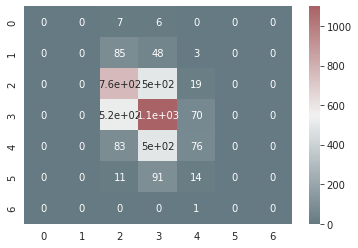

Средняя точность с настройкой гиперпараметров GridSearch:  0.4996079739143323


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [15]:
dtree_grid = DecisionTreeClassifier(random_state=42, max_depth=4.0, min_samples_leaf=0.01, min_samples_split=0.01)

print_result(y_test=y_test, pred=dtree_grid.fit(X_train, y_train).predict(X_test))
score = cross_val_score(dtree_grid, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность с настройкой гиперпараметров GridSearch: ', np.mean(score))

### Оценка точности классификаций тестовой и обучающей выборок.

In [ ]:
from sklearn.metrics import accuracy_score

max_depth = np.linspace(1, 32, 32, endpoint=True)
accuracy_result = []
cv_result = []
for md in max_depth:
  model = DecisionTreeClassifier(random_state=42, max_depth=md)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_test)
  accuracy_result.append(accuracy_score(y_test, model_pred))
  scores = cross_val_score(model, X_train, y_train, cv=5)
  cv_result.append(np.mean(scores))

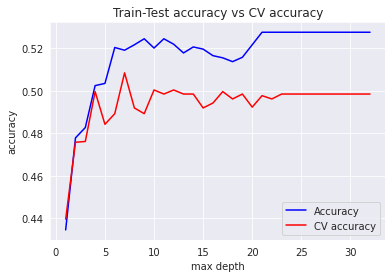

In [17]:
plt.plot(max_depth, accuracy_result, color='b', label='Accuracy')
plt.plot(max_depth, cv_result, color='r', label='CV accuracy')
plt.title('Train-Test accuracy vs CV accuracy')
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()
plt.show()

Рост точности происходит до глубины 23, далее точность константна. Вывод: значение max_depth, дающее максимальную точность, 23.
Иной результат дала настройка гиперпараметров поиском по сетке. 
Так как настройка гиперпараметров дала минимальный прирост значений, рост точности, пусть и незначительно, но достиг немного раньше глубины.

In [18]:
accuracy_result_train, accuracy_result_test = [],[]
for md in max_depth:
  model = DecisionTreeClassifier(random_state=42, max_depth=md)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_train)
  accuracy_result_train.append(accuracy_score(y_train, model_pred))

  model.fit(X_test ,y_test)
  model_pred = model.predict(X_test)
  accuracy_result_test.append(accuracy_score(y_test, model_pred))

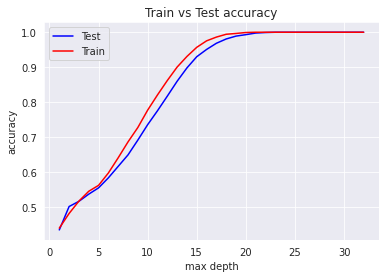

In [19]:
plt.plot(max_depth, accuracy_result_test, color='b', label='Test')
plt.plot(max_depth, accuracy_result_train, color='r', label='Train')
plt.title('Train vs Test accuracy')
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()
plt.show()

### Классификация с использованием масштабирования признаков

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

результат классификации: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.18      0.11      0.14       136
           2       0.56      0.57      0.57      1283
           3       0.56      0.57      0.57      1694
           4       0.47      0.48      0.48       656
           5       0.28      0.28      0.28       116
           6       0.00      0.00      0.00         1

    accuracy                           0.53      3899
   macro avg       0.29      0.29      0.29      3899
weighted avg       0.53      0.53      0.53      3899

Матрица ошибок: 
 [[  0   0   7   5   1   0   0]
 [  2  15  63  48   7   1   0]
 [  9  33 726 433  66  15   1]
 [ 10  26 395 971 251  40   1]
 [  1   7  72 232 317  26   1]
 [  1   2  22  30  29  32   0]
 [  0   0   0   0   1   0   0]] 



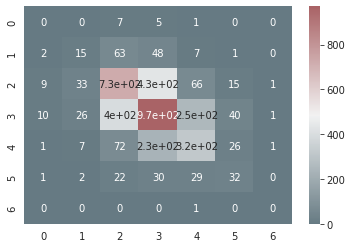

Средняя точность с масштабируемыми признаками:  0.4996176078257003


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


In [21]:
dtree_scaled = DecisionTreeClassifier(random_state=42)

print_result(y_test=y_test, pred=dtree_scaled.fit(X_train_scaled, y_train).predict(X_test_scaled))
score = cross_val_score(dtree_scaled, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('Средняя точность с масштабируемыми признаками: ', np.mean(score))

## Этап 2. Бинарная классификация.

### Загрузка данных.

In [22]:
stud_data = pd.read_csv('/content/drive/MyDrive/datasets/student-mat.csv')

### Посмотрим на полученные данные.

In [23]:
stud_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


### Описание данных

[***Dataset***](https://www.kaggle.com/uciml/student-alcohol-consumption)
- school - школа ученика (двоичная: GP - Габриэль Перейра или MS - Мусиньо да Силвейра)
- пол - пол студента (двоичные: 'F' - женский или 'M' - мужской)
- age - возраст студента (числовое значение: от 15 до 22)
- address - тип домашнего адреса студента (двоичный: 'U' - городской или 'R' - сельский)
- famsize - размер семьи (двоичное: 'LE3' - меньше или равно 3 или 'GT3' - больше 3)
- Pstatus - статус совместного проживания родителей (двоичный: «T» - проживают вместе или «A» - отдельно)
- Medu - образование матери (числовое значение: 0 - нет, 1 - начальное образование (4-й класс), 2 - с 5-го по 9-й класс, 3 - среднее образование или 4 - высшее образование)
- Fedu - образование отца (числовое значение: 0 - нет, 1 - начальное образование (4-й класс), 2 - с 5-го по 9-й класс, 3 - среднее образование или 4 - высшее образование)
- Mjob - работа матери (номинальное: «учитель», «медицинское обслуживание», гражданские «службы» (например, административные или полицейские), «at_home» или «другое»)
- Fjob - работа отца (номинальное: «учитель», «медицинское обслуживание», гражданские «службы» (например, административные или полицейские), «at_home» или «другое»)
- reason - причина выбрать эту школу (номинальная: близко к «дому», «репутация» школы, «предпочтение по курсу» или «другое»)
- guardian - опекун ученика (именное: «мать», «отец» или «другой»)
- traveltime - время в пути от дома до школы (числовое значение: 1–1 час)
- studytime - еженедельное учебное время (числовое значение: 1-10 часов)
- failures - количество прошлых сбоев класса (числовое: n, если 1 <= n <3, иначе 4)
- Schoolup - дополнительная образовательная поддержка (двоичная: да или нет)
- famsup - семейная образовательная поддержка (двоичная: да или нет)
- paid - дополнительные платные занятия по предмету курса (математика или португальский) (двоичный: да или нет)
- activities - внеклассные мероприятия (бинарные: да или нет)
- nursery - посещал детский сад (двоичный: да или нет)
- high - хочет получить высшее образование (двоичное: да или нет)
- internet - доступ в Интернет дома (двоичный: да или нет)
- romantic - с романтическими отношениями (бинарные: да или нет)
- famrel - качество семейных отношений (числовое значение: от 1 - очень плохо до 5 - отлично)
- freetime - свободное время после школы (числовое значение: от 1 - очень низкий до 5 - очень высокий)
- goout - встреча с друзьями (числовые: от 1 - очень низкий, до 5 - очень высокий)
- Dalc - потребление алкоголя в течение рабочего дня (числовое значение: от 1 - очень низкий до 5 - очень высокий)
- Walc - потребление алкоголя в выходные дни (числовое значение: от 1 - очень низкий до 5 - очень высокий)
- health - текущее состояние здоровья (числовое значение: от 1 - очень плохо до 5 - очень хорошо)
- absences - количество пропусков в школе (числовое значение: от 0 до 93)

### Предварительная обработка данных.

#### Удаление полей, которые невозможно бинаризировать.

In [24]:
stud_data.drop('school', axis=1, inplace=True)
stud_data.drop('sex', axis=1, inplace=True)
stud_data.drop('address', axis=1, inplace=True)
stud_data.drop('famsize', axis=1, inplace=True)
stud_data.drop('Pstatus', axis=1, inplace=True)
stud_data.drop('Mjob', axis=1, inplace=True)
stud_data.drop('Fjob', axis=1, inplace=True)
stud_data.drop('reason', axis=1, inplace=True)
stud_data.drop('guardian', axis=1, inplace=True)

#### Бинаризация полей

In [25]:
stud_data = stud_data.replace(['no', 'yes'], [0,1])
target = stud_data.activities
features = stud_data.drop(['activities'], axis=1)

### Разделение данных на выборки.

In [26]:
stud_data

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10


In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=True)

### Классификация без настройки параметров.

результат классификации: 
               precision    recall  f1-score   support

           0       0.47      0.56      0.51        54
           1       0.56      0.48      0.52        65

    accuracy                           0.51       119
   macro avg       0.52      0.52      0.51       119
weighted avg       0.52      0.51      0.51       119

Матрица ошибок: 
 [[30 24]
 [34 31]] 



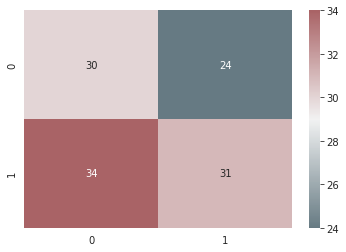

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, solver='newton-cg')
lr.fit(X_train ,y_train)
lr_pred = lr.predict(X_test)

print_result(y_test=y_test, pred=lr_pred)

#### Оценка точности

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, cv=5)
print('Средняя оценка точности: ', np.mean(scores))

Средняя оценка точности:  0.5578571428571428


### Классификация c настройкой параметров.

In [30]:
from sklearn.metrics import accuracy_score

penalties = ['l2', 'none']
accuracy_result = []
cv_result = []
for penalty in penalties:
  # для 'newton-cg' возможно испльзование только 'l2' или 'none' в качестве параметров
  model = LogisticRegression(random_state=42, solver='newton-cg', penalty=penalty)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_test)
  accuracy_result.append(accuracy_score(y_test, model_pred))
  scores = cross_val_score(model, X_train, y_train, cv=5)
  cv_result.append(np.mean(scores))

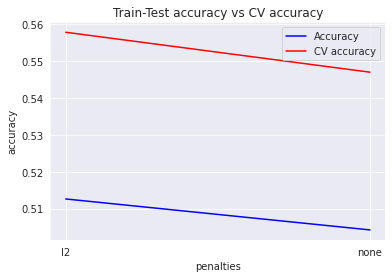

In [31]:
plt.plot(penalties, accuracy_result, color='b', label='Accuracy')
plt.plot(penalties, cv_result, color='r', label='CV accuracy')
plt.title('Train-Test accuracy vs CV accuracy')
plt.legend()
plt.xlabel('penalties'); plt.ylabel('accuracy')
plt.show()

Точность по оценке train-test без регуляризации даёт лучший результат.

In [32]:
accuracy_result_train, accuracy_result_test = [],[]
for penalty in penalties:
  model = LogisticRegression(random_state=42, solver='newton-cg', penalty=penalty)
  model.fit(X_train ,y_train)
  model_pred = model.predict(X_train)
  accuracy_result_train.append(accuracy_score(y_train, model_pred))

  model.fit(X_test ,y_test)
  model_pred = model.predict(X_test)
  accuracy_result_test.append(accuracy_score(y_test, model_pred))

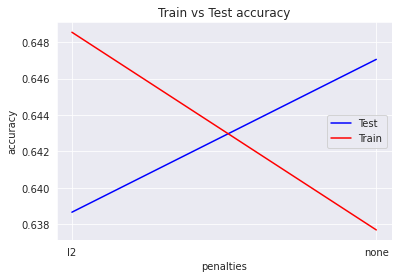

In [33]:
plt.plot(penalties, accuracy_result_test, color='b', label='Test')
plt.plot(penalties, accuracy_result_train, color='r', label='Train')
plt.title('Train vs Test accuracy')
plt.xlabel('penalties'); plt.ylabel('accuracy')
plt.legend()
plt.show()

### Масштабирование признаков

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

результат классификации: 
               precision    recall  f1-score   support

           0       0.47      0.54      0.50        54
           1       0.56      0.49      0.52        65

    accuracy                           0.51       119
   macro avg       0.51      0.51      0.51       119
weighted avg       0.52      0.51      0.51       119

Матрица ошибок: 
 [[29 25]
 [33 32]] 



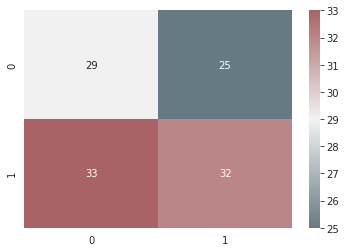

In [35]:
lr = LogisticRegression(random_state=42, solver='newton-cg')
lr.fit(X_train_scaled ,y_train)
lr_pred = lr.predict(X_test_scaled)

print_result(y_test=y_test, pred=lr_pred)

In [36]:
scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print('Средняя оценка точности: ', np.mean(scores))

Средняя оценка точности:  0.5325324675324674


### Настройка гиперпараметров

In [37]:
params={"C":[*np.arange(0,1,0.01)], "penalty":["none","l2"]}
do_grid_search(model=lr,  params=params, x_train=X_train, y_train=y_train, x_test=X_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params for accuracy
{'C': 0.56, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/loca

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


результат классификации: 
               precision    recall  f1-score   support

           0       0.50      0.57      0.53        54
           1       0.60      0.52      0.56        65

    accuracy                           0.55       119
   macro avg       0.55      0.55      0.55       119
weighted avg       0.55      0.55      0.55       119

Матрица ошибок: 
 [[31 23]
 [31 34]] 



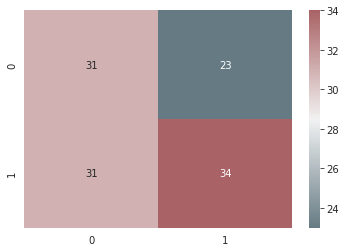

Средняя точность с настройкой гиперпараметров GridSearch:  0.5507142857142856


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [38]:
lr = LogisticRegression(C=.34,penalty="l2")
lr.fit(X_train,y_train)

print_result(y_test=y_test, pred=lr.fit(X_train, y_train).predict(X_test))
score = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность с настройкой гиперпараметров GridSearch: ', np.mean(score))

С настройкой гиперпараметров точность алгоритма увеличались на 0.02 (примерно)